# Iris dataset using Random Forest Classifier

###### Apr-27-2019


In [15]:
# import the required library from python
import pandas as pd
import numpy as np
import sklearn


In [2]:
# Loading the dataset from the file
iris_data = pd.read_csv("E:/Data Scientist/Datasets/iris.csv")

In [3]:
# Explore the dataset
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# Summary of the datasets
iris_data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
# Information regarding the dataset
iris_data.info()
iris_data.head(2)
iris_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [20]:
# Import the train_test_split function from python sklearn library
# split the dependent variables and independent variables
from sklearn.model_selection import train_test_split
# Independent variable from the dataset
iris_inde = iris_data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
# Dependent variable from the dataset
iris_target = iris_data[['Species']]
# Splitign the dataset into training and test sets
inde_train,inde_test,target_train,target_test = train_test_split(iris_inde,iris_target,test_size=0.3)

In [29]:
# Import random forest model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators =100)

# Train the model using the training sets 
clf.fit(inde_train,target_train)
# predict the target variables for the test set 
target_pred = clf.predict(inde_test)

c:\users\gudis\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [30]:
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# model accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test,target_pred))


Accuracy: 0.933333333333


In [36]:
# Importance feature of the dataset
feature_imp = pd.Series(clf.feature_importances_,index=iris_inde.columns).sort_values(ascending=False)
feature_imp

Petal.Width     0.456433
Petal.Length    0.431162
Sepal.Length    0.095086
Sepal.Width     0.017319
dtype: float64

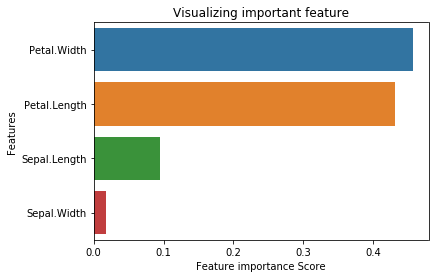

In [37]:
# Even we get the visualizing most influencing features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# creating  a bar plot
sns.barplot(x=feature_imp, y= feature_imp.index)
# add labels to graph
plt.xlabel('Feature importance Score')
plt.ylabel('Features')
plt.title("Visualizing important feature")
plt.legend()
plt.show()

In [49]:
# from the above visualize we can say Sepal.Width is least influence on classifier tree
# so we remove this feature or variable
# import train_test_split function
from sklearn.model_selection import train_test_split
# spliting dataset into features and labels without Sepal.Width
iris_inde1 = iris_data[['Sepal.Length','Petal.Length','Petal.Width']]
iris_target1 = iris_data[['Species']]
# Split dataset into training set and test set
inde_train1, inde_test1, target_train1,target_test1 = train_test_split(iris_inde,iris_target,test_size=0.3,random_state=5)

In [50]:
from sklearn.ensemble import RandomForestClassifier
# create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)
# Train the model with training dataset which was split before
clf.fit(inde_train1,target_train1)
# predict on test set
target_pred = clf.predict(inde_test1)
# import metrics from sklearn
from sklearn import metrics
# model accuracy
print("Accuracy:",metrics.accuracy_score(target_test1,target_pred))


Accuracy: 0.955555555556


c:\users\gudis\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
# as there in increasing the accuracy of the dataset after removing irrelevant feature from dataframe